# July 11th, 2021

**Motivation**: Cleanup ***SVINET*** results, **showcase** plotting functions <br>


In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
svinet_ws = pjoin(os.environ['HOME'], 'Documents/workspaces/svinet')


# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
_dir = '/mnt/storage/hadi/MouseConnectome_Coletta20/03_modules_and_connector_hubs/00_modules'
os.listdir(_dir)

[
    'module_2.nii.gz',
    'module_4.nii.gz',
    'module_1.nii.gz',
    'module_3.nii.gz',
    'modules_consensus_unified.nii.gz',
    'modules_unified.mat',
    'module_5.nii.gz'
]

In [3]:
file = pjoin(_dir, 'modules_consensus_unified.nii.gz')
img = nib.load(file).get_fdata()

<matplotlib.colorbar.Colorbar object at 0x7f8a3b1084f0>

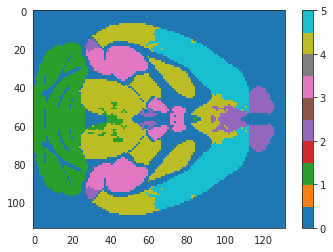

In [4]:
plt.imshow(img[:, 50, :], cmap='tab10')
plt.colorbar()

## Mice & Net

In [95]:
mice = Mice(Config(256))
mice.combine_dfs('rest')

key = 'sub-SLC'
metric = 'spearman'
mode = 'bold'
net = Network(
    mice=mice,
    key=key,
    metric=metric,
    mode=mode,
    binarize=False,
).fit()

...merging dicts: 0it [00:00, ?it/s]

## SVINET

In [6]:
perc = 30
num_comm = 6
expt_name = next(k for k in net.graphs if f"p{perc}" in k)

### - either: laod

current expt name: 'bold_spearman_sub-SLC_n128_p30'

[PROGRESS] loading 'k6-cosine-linksampling-(2021_07_13)' from
'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/b
old_spearman_sub-SLC_n128_p30'

  0%|          | 0/100 [00:00<?, ?it/s]

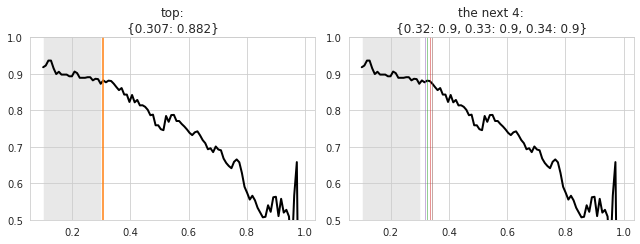

[PROGRESS] process results: done

[PROGRESS] 9591 results loaded

00 - 00:00:17  (dd - hh:mm:ss)

In [8]:
start = time()
svinet = SVINET(
    net=net,
    num_k=num_comm,
    expt_name=expt_name,
    match_metric='cosine',
    load_kws='linksampling',
).load_resuts()
end = time()

convert_time(end - start)

### - or: fit

current expt name: 'bold_spearman_sub-SLC_n128_p20'

some runs with k != 5 were excluded:
25 x k = 4

[PROGRESS] experiment loaded: 'bold_spearman_sub-SLC_n128_p20',  total # runs:  9975

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

...merging dicts: 0it [00:00, ?it/s]

[PROGRESS] find best mappings: done

[PROGRESS] results aligned: done

  0%|          | 0/9975 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

[PROGRESS] membership df: done

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_spearman_sub-SLC_n128_p20/k5-cosine-linksampling-(2021_07_14)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_spearman_sub-SLC_n128_p20/k5-cosine-linksampling-(2021_07_14)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_spearman_sub-SLC_n128_p20/k5-cosine-linksampling-(2021_07_14)

  0%|          | 0/100 [00:00<?, ?it/s]

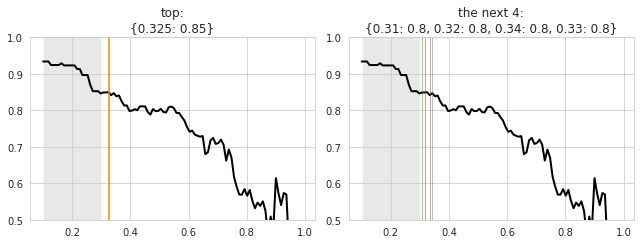

[PROGRESS] process results: done

[PROGRESS] fit: done!

00 - 00:03:11  (dd - hh:mm:ss)

In [10]:
start = time()
svinet = SVINET(
    net=net,
    num_k=num_comm,
    expt_name=expt_name,
    match_metric='cosine',
    load_kws='linksampling',
).load_runs(svinet_ws).fit(repeats=1)
end = time()

convert_time(end - start)

## Plot results

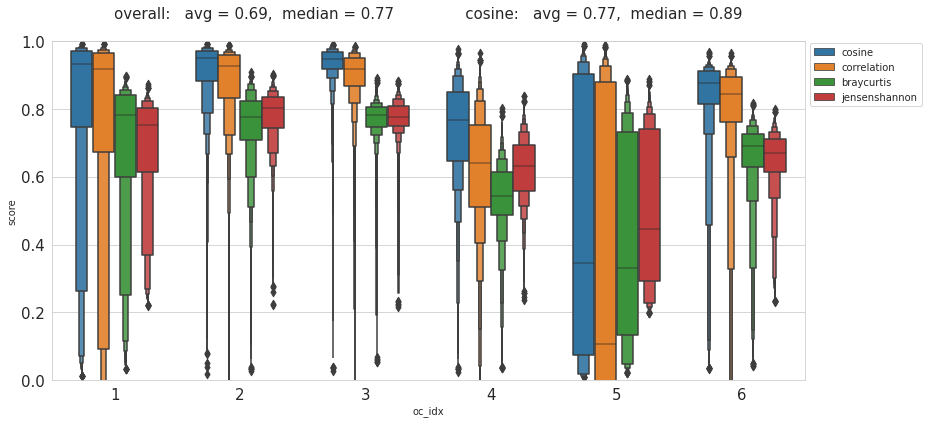

In [10]:
_ = svinet.plot_performance()

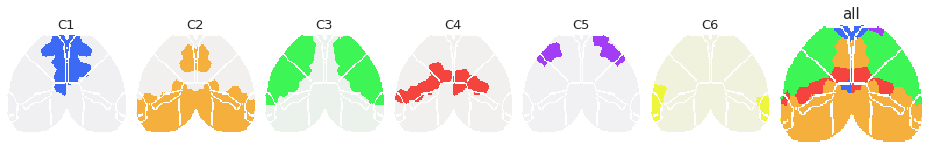

In [11]:
_ = svinet.plot_communities_2d(disjoint=True)

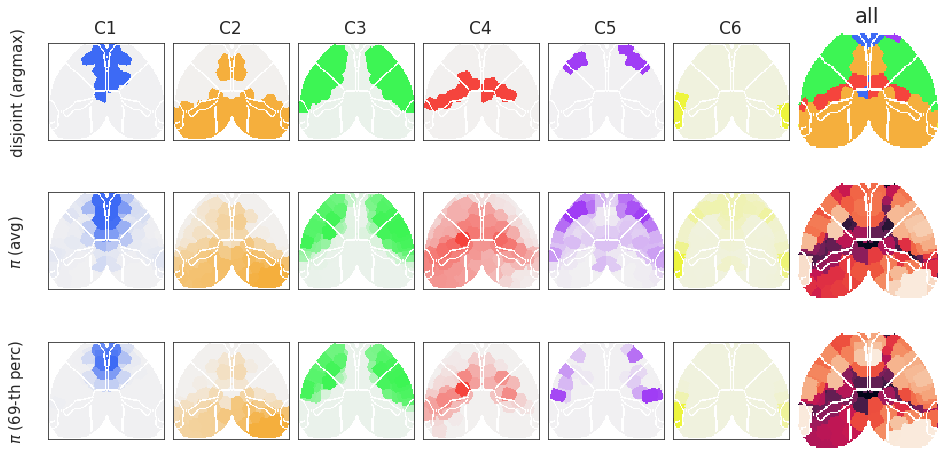

In [12]:
_ = svinet.plot_memberships_2d()

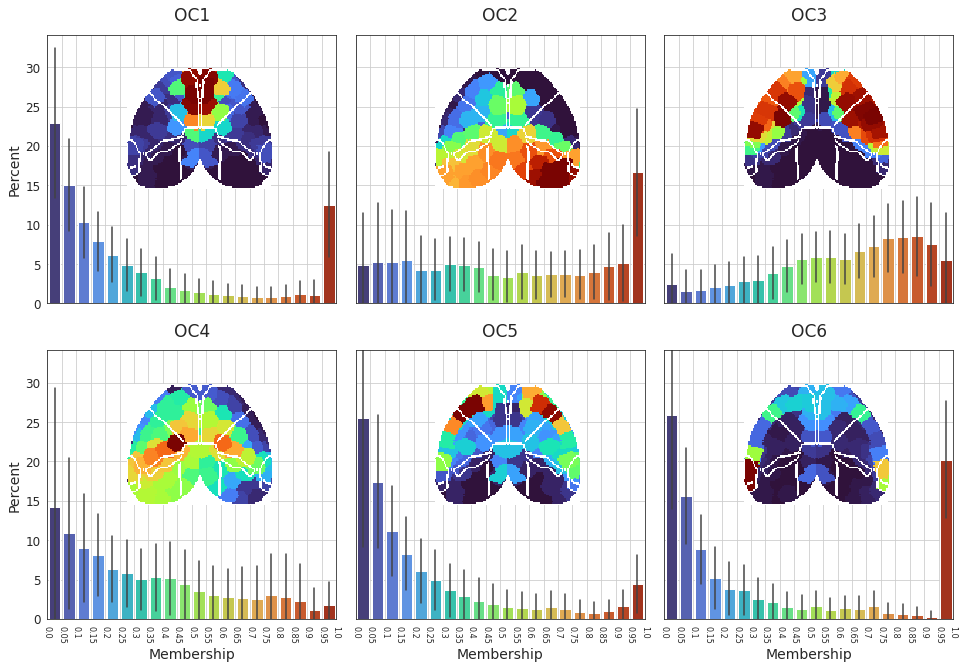

In [13]:
_ = svinet.plot_memberships('bar')

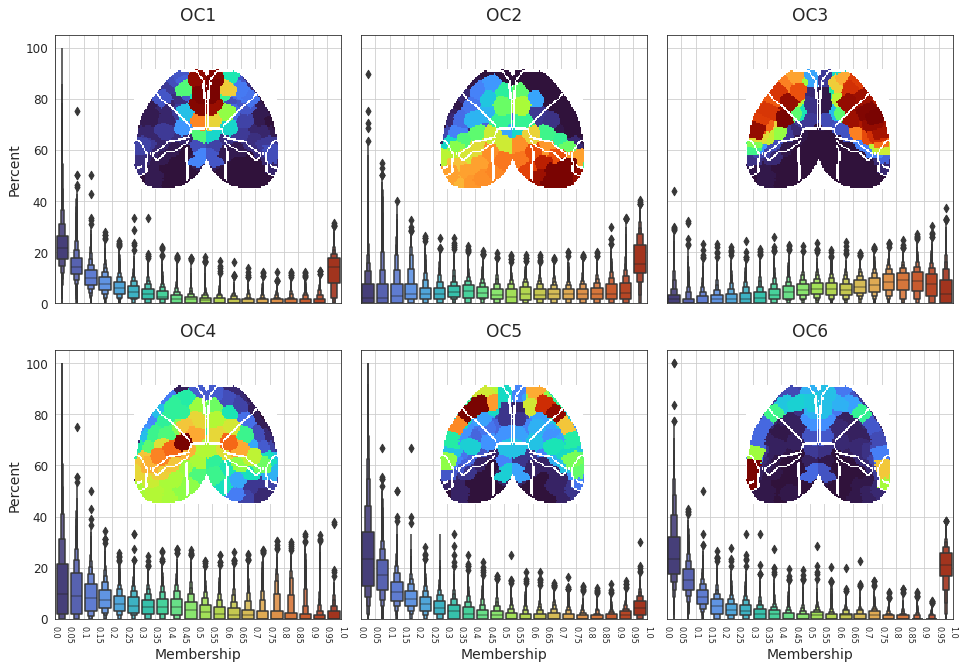

In [14]:
_ = svinet.plot_memberships('box')

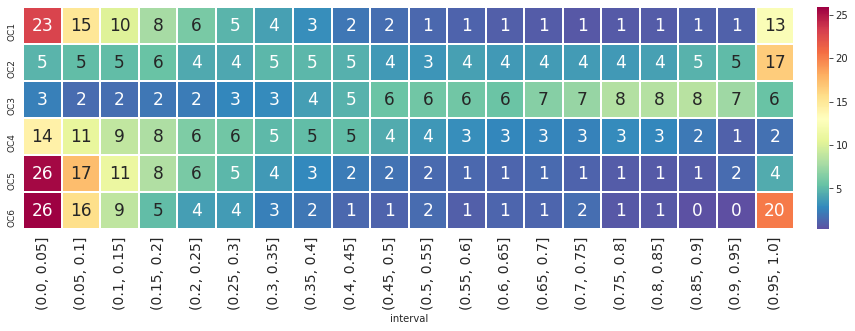

In [15]:
_ = svinet.plot_membership_heatmap(ytick_labelsize=9)

In [16]:
svinet.clusters

STR C_6 100% PAL C_6 100% OLF C_6 100% CTXsp C_6 100% HPF C_6 100% VIS C_2 95% TEa C_6 38% C_2 34% C_3 19% PERI C_6 76% C_3 7% C_2 3% ECT C_6 79% C_3 7% C_2 5% RSP C_2 80% C_4 7% C_1 7% AUD C_2 51% C_3 26% C_4 9% C_6 6% PTLp C_2 96% VISC C_3 75% C_6 17% SS C_3 70% C_4 14% C_2 10% SSp C_3 66% C_4 18% C_2 12% SSp-bfd C_3 49% C_2 26% C_4 20% SSp-ll C_4 72% C_2 13% C_3 12% SSp-m C_3 95% SSp-n C_3 95% SSp-tr C_2 63% C_4 35% SSp-ul C_3 78% C_4 20% SSp-un C_3 74% C_4 22% SSs C_3 83% C_2 7% C_4 3% GU C_3 84% C_5 9% ACA C_1 72% C_2 19% C_4 3% C_3 1% AI C_3 44% C_5 39% C_6 5% C_1 3% MO C_3 63% C_4 12% C_2 12% C_1 8% C_5 2% MOp C_3 74% C_4 16% C_1 6% C_2 1% MOs C_3 54% C_2 21% C_1 10% C_4 9% C_5 4% ILA C_1 96% PL C_1 91% C_3 5% C_2 2% ORB C_1 76% C_3 15% C_5 7% FRP C_1 39% C_3 32% C_5 28%

In [18]:
svinet.render(cortex_only=True)
svinet.render(cortex_only=False)

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_spearman_sub-SLC_n128_p30/k6-cosine-linksampling-(2021_07_13)/render/overla
p_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_spearman_sub-SLC_n128_p30/k6-cosine-linksampling-(2021_07_13)/render/disjoi
nt_cortex_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_spearman_sub-SLC_n128_p30/k6-cosine-linksampling-(2021_07_13)/render/overla
p_brain_k6.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_spearman_sub-SLC_n128_p30/k6-cosine-linksampling-(2021_07_13)/render/disjoi
nt_brain_k6.html

In [19]:
scores = svinet.pi_symmetry_score()
np.mean(list(scores.values())), scores

(0.9525000000000001, {1: 0.968, 2: 0.967, 3: 0.967, 4: 0.894, 5: 0.95, 6: 0.969})

## Entropy

In [94]:
svinet.entropy_score()

0.962

<matplotlib.colorbar.Colorbar object at 0x7f89f052ff40>

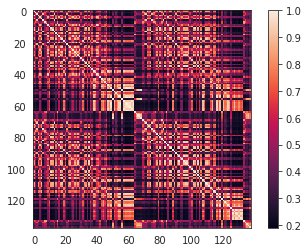

In [21]:
js_dist = sp_dist.pdist(svinet.pi.T, metric='jensenshannon')
js_dist = sp_dist.squareform(js_dist)
js_sim = 1 - js_dist
plt.imshow(js_sim)
plt.colorbar()

In [54]:
community = {
    idx: [net.l2n[region] for region in x]
    for idx, x in svinet.disjoint_community().items()
}
low_thres = np.quantile(svinet.h, 0.1)
high_thres = np.quantile(svinet.h, 0.9)

dict_list = []
for i, j, data in net.graphs[svinet.expt_name].edges(data=True):
    c_i = next(idx for idx, x in community.items() if i in x)
    c_j = next(idx for idx, x in community.items() if j in x)
    link = 'within' if c_i == c_j else 'across'
    
    if svinet.h[i] > high_thres:
        entropy_i = 'high'
    elif svinet.h[i] < low_thres:
        entropy_i = 'low'
    else:
        entropy_i = 'mid'
    
    if svinet.h[j] > high_thres:
        entropy_j = 'high'
    elif svinet.h[j] < low_thres:
        entropy_j = 'low'
    else:
        entropy_j = 'mid'
        
    if entropy_i == entropy_j:
        entropy = entropy_i
    else:
        entropy = '-'.join(sorted([entropy_i, entropy_j]))
    
    data_dict = {
        'i': [i],
        'j': [j],
        'c_i': [c_i],
        'c_j': [c_j],
        'link': [link],
        'entropy': [entropy], 
        'weight': [data['weight']],
        'js_dist': [js_dist[i, j]],
        'js_sim': [js_sim[i, j]],
    }
    dict_list.append(data_dict)
df = pd.DataFrame(merge_dicts(dict_list))

...merging dicts: 0it [00:00, ?it/s]

<AxesSubplot:xlabel='js_sim', ylabel='weight'>

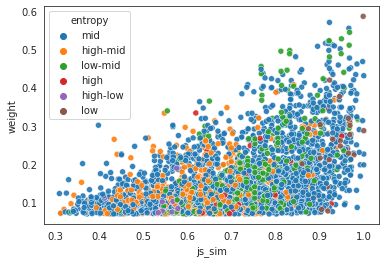

In [55]:
sns.scatterplot(
    data=df,
    y='weight',
    x='js_sim',
    hue='entropy',
    # palette={'across': 'r', 'within': 'k'},
    alpha=0.9,
)

<AxesSubplot:xlabel='js_sim', ylabel='weight'>

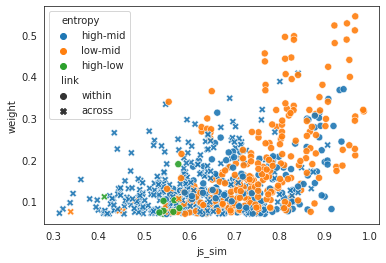

In [75]:
_df = df.loc[df.entropy.isin(['high-low', 'high-mid', 'low-mid'])]
sns.scatterplot(
    data=_df,
    y='weight',
    x='js_sim',
    hue='entropy',
    style='link',
    # palette={'across': 'r', 'within': 'k'},
    s=50,
    alpha=0.9,
)

In [69]:
_df

,i,j,c_i,c_j,link,entropy,weight,js_dist,js_sim
148,4,10,3,2,across,high,0.333799,0.380686,0.619314
158,4,24,3,4,across,high,0.114263,0.232346,0.767654
159,4,25,3,3,within,high,0.224952,0.085792,0.914208
172,4,45,3,4,across,high,0.112067,0.224043,0.775957
204,4,92,3,3,within,high-low,0.087508,0.416190,0.583810
...,...,...,...,...,...,...,...,...,...
2844,129,131,2,2,within,low,0.301245,0.031275,0.968725
2845,129,132,2,2,within,low,0.211840,0.078451,0.921549
2846,130,131,2,2,within,low,0.292586,0.125433,0.874567
2847,130,132,2,2,within,low,0.419753,0.077496,0.922504


<AxesSubplot:xlabel='js_sim', ylabel='weight'>

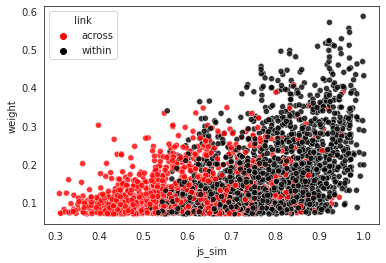

In [58]:
sns.scatterplot(
    data=df,
    y='weight',
    x='js_sim',
    hue='link',
    palette={'across': 'r', 'within': 'k'},
    alpha=0.8,
)

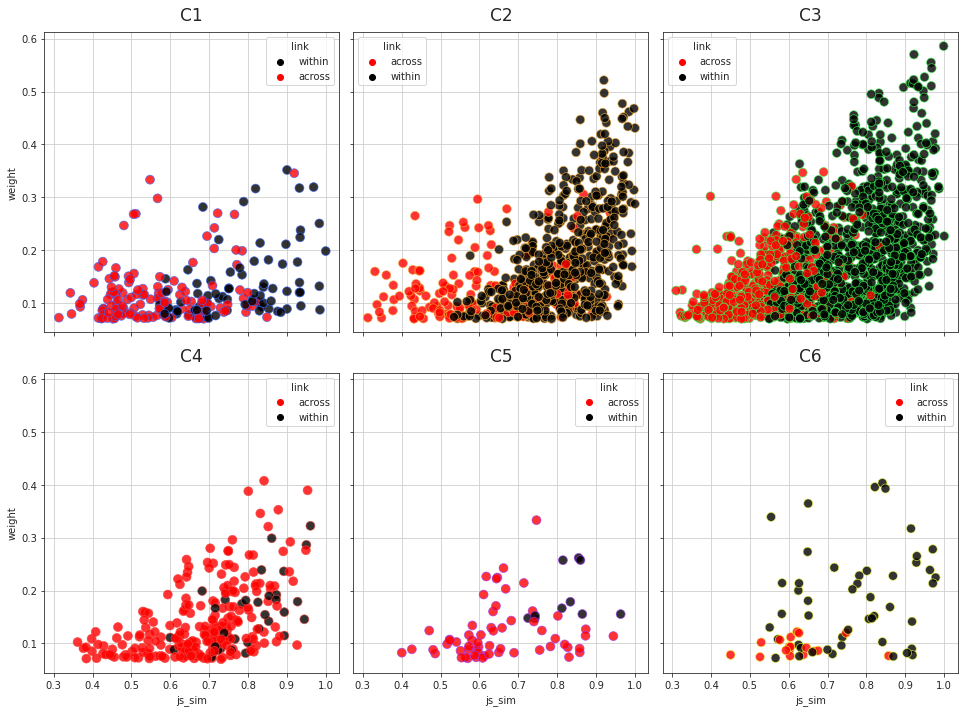

In [78]:
fig, axes = create_figure(2, 3, (13.5, 10), 'ticks', 'all', 'all')
save_dir = svinet.get_save_path('centrality_plots')

for ax, idx in zip(axes.ravel(), range(1, svinet.num_k + 1)):
    _df = df.loc[df.c_i == idx]
    sns.scatterplot(
        data=_df,
        y='weight',
        x='js_sim',
        hue='link',
        s=80,
        edgecolor=svinet.colors[idx],
        palette={'across': 'r', 'within': 'k'},
        alpha=0.8,
        ax=ax,
    )
    ax.set_title(f"C{idx}", fontsize=17, y=1.02)
    # ax.axhline(net.thresholds[perc])
    ax.grid()
trim_axs(axes, svinet.num_k)
file = pjoin(save_dir, 'JS_vs_weight.pdf')
fig.savefig(file, bbox_inches='tight')
plt.show()

In [79]:
selected_measures = [
    'degree_w',
    'closeness',
    'betweenness_w',
    'eigenvector_w',
]
cent_df = net.centralities[svinet.expt_name]
cent_df = cent_df.loc[cent_df.measure.isin(selected_measures)]
cent_df = pd.concat([
    pd.DataFrame({
        'name': [svinet.expt_name] * len(svinet.h),
        'measure': ['entropy'] * len(svinet.h),
        'node': range(len(svinet.h)),
        'centrality': svinet.h, }),
    cent_df,
])
cent_df = pd.concat([cent_df, pd.DataFrame(columns=['oc_idx'])], axis=1)
partition = {n: i + 1 for n, i in enumerate(np.argmax(svinet.pi, axis=0))}
for n, idx in partition.items():
    cent_df.loc[cent_df.node == n, 'oc_idx'] = idx

_df = cent_df.groupby(['node', 'measure']).mean().unstack()
_df = _df.centrality

_df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)

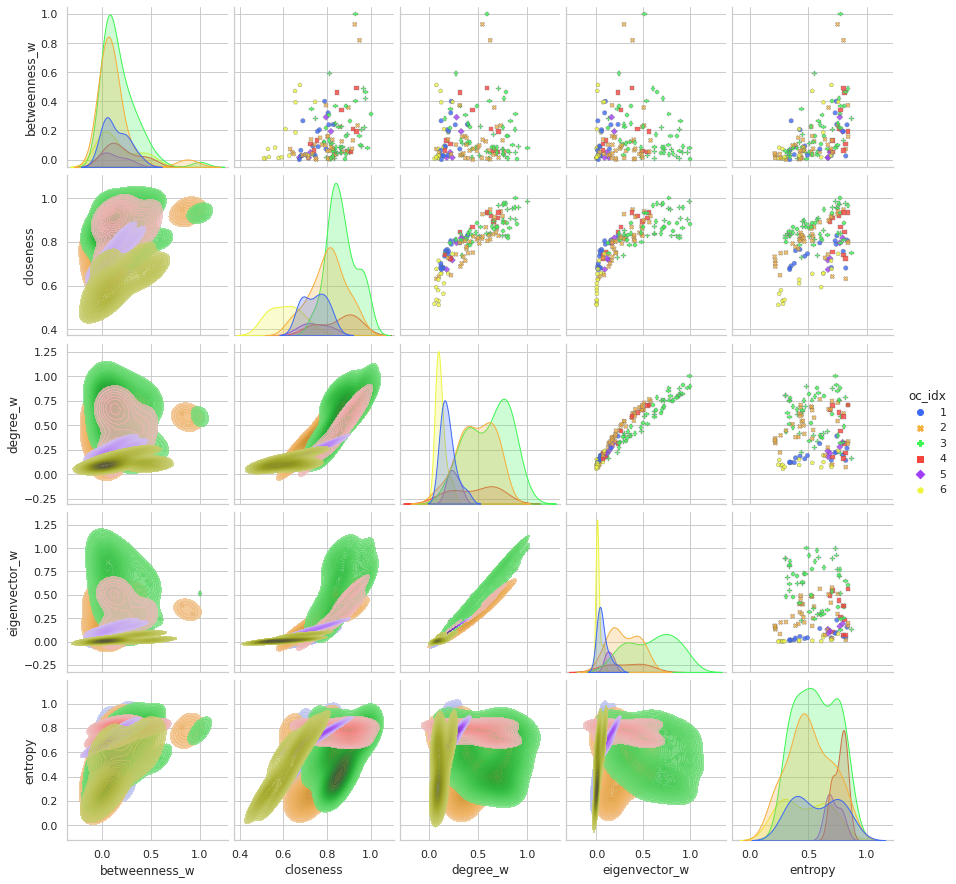

In [84]:
sns.set_theme(style='whitegrid', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

pg = sns.pairplot(
    data=_df,
    hue='oc_idx',
    markers=['o', 'X', 'P', 's', 'D', 'p'],
    palette=svinet.colors,
    plot_kws={'alpha': 0.8, 's': 20, 'edgecolor': 'dimgrey'},
)
pg.map_lower(
    func=sns.kdeplot,
    levels=50,
    color=".2",
    fill=True,
    alpha=0.8,
)
file = pjoin(save_dir, 'pair.pdf')
pg.savefig(file, bbox_inches='tight')

plt.show()

In [86]:
selected_measures = [
    'degree',
    'degree_w',
    'betweenness',
    'betweenness_w',
    'eigenvector',
    'eigenvector_w',
    'closeness',
]
cent_df = net.centralities[svinet.expt_name]
cent_df = cent_df.loc[cent_df.measure.isin(selected_measures)]
cent_df = pd.concat([
    pd.DataFrame({
        'name': [svinet.expt_name] * len(svinet.h),
        'measure': ['entropy'] * len(svinet.h),
        'node': range(len(svinet.h)),
        'centrality': svinet.h, }),
    cent_df,
])
cent_df = pd.concat([cent_df, pd.DataFrame(columns=['oc_idx'])], axis=1)
partition = {n: i + 1 for n, i in enumerate(np.argmax(svinet.pi, axis=0))}
for n, idx in partition.items():
    cent_df.loc[cent_df.node == n, 'oc_idx'] = idx

_df = cent_df.groupby(['node', 'measure']).mean().unstack()
_df = _df.centrality

_df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)

In [87]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        space=0,
    )
    jg.plot_joint(
        sns.kdeplot,
        fill=True,
        clip=((0, 1), (0, 1.0)),
        thresh=0.,
        levels=20,
        gridsize=200,
        cmap="rocket",
    )
    jg.plot_marginals(
        sns.histplot,
        color='#03051A',
        alpha=0.8,
        bins=40,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls=':',
        lw=0.8,
        alpha=1.0,
        c=sns.color_palette('deep')[-1],
        label=f"entropy median: {np.median(svinet.h):.2f}",
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 8})

    file = pjoin(save_dir, f"{measure}_density.pdf")
    jg.savefig(file)
    plt.close()

In [88]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    _df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        hue='oc_idx',
        size=8,
        palette=svinet.colors,
        xlim=(0, 1),
        ylim=(0, 1),
        space=0.0,
    )
    jg.plot_joint(
        sns.scatterplot,
        hue='oc_idx',
        s=180,
        alpha=0.9,
        edgecolor='dimgrey',
    )
    jg.plot_marginals(
        sns.kdeplot,
        fill=True,
        alpha=0.5,
        lw=2,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls='--',
        lw=2,
        alpha=1.0,
        c=sns.color_palette('deep')[7],
        label=f"entropy median: {np.median(svinet.h):.2f}",
        zorder=0,
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 9})
    
    file = pjoin(save_dir, f"{measure}_scatter.pdf")
    jg.savefig(file)
    plt.close()

In [89]:
sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

all_measures = cent_df.measure.unique().tolist()
all_measures.remove('entropy')
for measure in all_measures:
    _df = cent_df.loc[cent_df.measure.isin([measure, 'entropy'])]
    _df = _df.groupby(['node', 'measure']).mean().unstack()
    _df = _df.centrality
    _df = pd.concat([_df, pd.DataFrame({'oc_idx': partition})], axis=1)
    
    jg = sns.JointGrid(
        data=_df,
        x='entropy',
        y=measure,
        hue='oc_idx',
        size=8,
        palette=svinet.colors,
        xlim=(0, 1),
        ylim=(0, 1),
        space=0.0,
    )
    jg.plot_joint(
        sns.histplot,
        bins=30,
        alpha=0.9,
    )
    jg.plot_marginals(
        sns.kdeplot,
        fill=True,
        alpha=0.5,
    )
    jg.ax_joint.axvline(
        x=np.median(svinet.h),
        ls='--',
        lw=2,
        alpha=1.0,
        c=sns.color_palette('deep')[7],
        label=f"entropy median: {np.median(svinet.h):.2f}",
    )
    jg.ax_joint.legend(loc='upper left', prop={'size': 9})
    
    file = pjoin(save_dir, f"{measure}_histogram.pdf")
    jg.savefig(file)
    plt.close()

In [90]:
svinet.prepare_plot_material(cortex_only=True)

cent_vec = {
    m: {
        region: cent_df.loc[cent_df.measure == m, 'centrality'].values[n]
        for n, region in svinet.net.n2l.items()
    } for m in cent_df.measure.unique()
}
cent_vol = vec2vol(cent_vec, net.mice)

if svinet.plot_cortex_only:
    cent_vol = {
        idx: v * net.mice.allen['isocortex_mask']
        for idx, v in cent_vol.items()
    }
    
list(cent_vol)

[
    'entropy',
    'degree_w',
    'degree',
    'eigenvector',
    'eigenvector_w',
    'closeness',
    'betweenness',
    'betweenness_w'
]

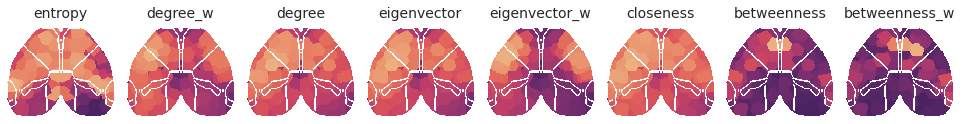

In [91]:
fig, axes = create_figure(1, len(cent_vol), (13.5, 5))

sns.set_theme(style='white', palette='deep')
save_dir = svinet.get_save_path('centrality_plots')

for ax, (k, m) in zip(axes, cent_vol.items()):
    cent_arr = project_vol_2d(
        vol_data={k: m},
        dims_flat=net.mice.allen['dims_flat'],
        mode='max_proj',
    )

    if svinet.plot_cortex_only:
        mask = svinet.net.mice.parcel.results2d['parcel']
    else:
        mask = svinet.net.mice.parcel.results2d['atlas']
    cent_arr = svinet._trim(cent_arr, mask)

    data2plt = np.ma.masked_where(svinet.contour2d, cent_arr)
    ax.imshow(data2plt, cmap='flare_r')
    ax.set_title(k, fontsize=14, y=1.05)
remove_ticks(axes)
file = pjoin(save_dir, f"centralities_2d.pdf")
fig.savefig(file, bbox_inches='tight')
plt.show()

In [92]:
community = {
    idx: [net.l2n[region] for region in x]
    for idx, x in svinet.disjoint_community().items()
}


dict_list = []
for lbl, f in net._group_centrality_fn.items():
    for idx, comm_list in community.items():
        data_dict = {
            'measure': [lbl],
            'oc_idx': [idx],
            'centrality': [f(net.graphs[svinet.expt_name], comm_list)],
        }
        dict_list.append(data_dict)
grp_cent_df = pd.DataFrame(merge_dicts(dict_list))

...merging dicts: 0it [00:00, ?it/s]

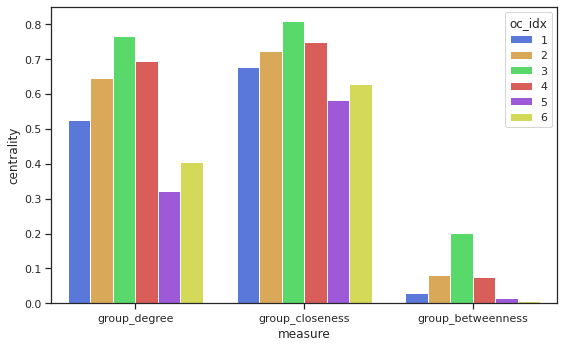

In [93]:
fig, ax = create_figure(1, 1, (8, 5), 'ticks')
sns.barplot(
    data=grp_cent_df,
    x='measure',
    y='centrality',
    hue='oc_idx',
    palette=svinet.colors,
    saturation=0.7,
    ax=ax,
)
plt.show()